In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import random

In [3]:
train_df = pd.read_csv('../data/train_df.csv')
train_df

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good
4273,4273,14273.png,transistor,good,transistor-good
4274,4274,14274.png,grid,good,grid-good
4275,4275,14275.png,zipper,good,zipper-good


# Label - class 개수

In [107]:
label_list = list(train_df['class'].unique())
label_enc = {k:i for i, k in enumerate(label_list)}
label_dec = {v:k for k, v in label_enc.items()}

c:\users\sub\anaconda3\envs\torch-sub\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


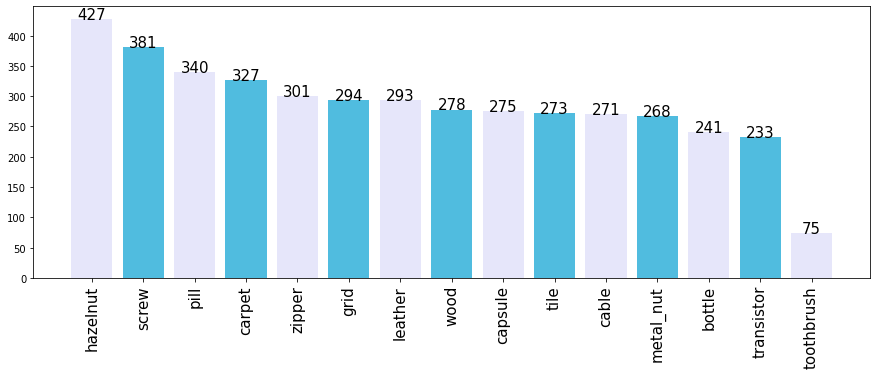

In [108]:
class_cnt = dict(train_df['class'].value_counts())#.sort_values(ascending=False)

f, axs = plt.subplots(1,1, figsize=(15,5))

axs.bar(class_cnt.keys(), class_cnt.values(), color=['#e6e6fa' if a%2==0 else '#50bcdf' for a in range(len(label_list))])
for k, v in class_cnt.items() :
    axs.annotate('%d'%(v), xy=(k, v), textcoords='data', ha='center',fontsize=15)
axs.set_xticklabels(class_cnt.keys(), rotation=90, fontsize=15)
# f.tight_layout()
plt.show()

# Label - label 조합 개수

In [134]:
state_list = [list(train_df['state'][train_df['class']==label].unique()) for label in label_list]
label_comb_cnt = {}
for idx, label in enumerate(label_list) :
    label_comb_cnt[label] = {state : len(train_df[train_df['class']==label][train_df['state']==state]) 
                         for state in state_list[idx]}

f, axs = plt.subplots(4,4, figsize=(15,10))
axs = axs.flatten()

for

c:\users\sub\anaconda3\envs\torch-sub\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


{'transistor': {'good': 213,
  'bent_lead': 5,
  'damaged_case': 5,
  'misplaced': 5,
  'cut_lead': 5},
 'capsule': {'good': 219,
  'squeeze': 10,
  'crack': 12,
  'poke': 11,
  'faulty_imprint': 11,
  'scratch': 12},
 'wood': {'good': 247,
  'combined': 6,
  'scratch': 11,
  'color': 4,
  'hole': 5,
  'liquid': 5},
 'bottle': {'good': 209,
  'contamination': 11,
  'broken_large': 10,
  'broken_small': 11},
 'screw': {'good': 320,
  'thread_side': 12,
  'manipulated_front': 12,
  'thread_top': 12,
  'scratch_neck': 13,
  'scratch_head': 12},
 'cable': {'bent_wire': 7,
  'good': 224,
  'missing_cable': 6,
  'cut_outer_insulation': 5,
  'cut_inner_insulation': 7,
  'missing_wire': 5,
  'combined': 6,
  'cable_swap': 6,
  'poke_insulation': 5},
 'carpet': {'hole': 9,
  'good': 280,
  'metal_contamination': 9,
  'thread': 10,
  'color': 10,
  'cut': 9},
 'hazelnut': {'good': 391, 'crack': 9, 'cut': 9, 'hole': 9, 'print': 9},
 'pill': {'pill_type': 5,
  'good': 267,
  'scratch': 12,
  'crac

# Label - class 별 이미지

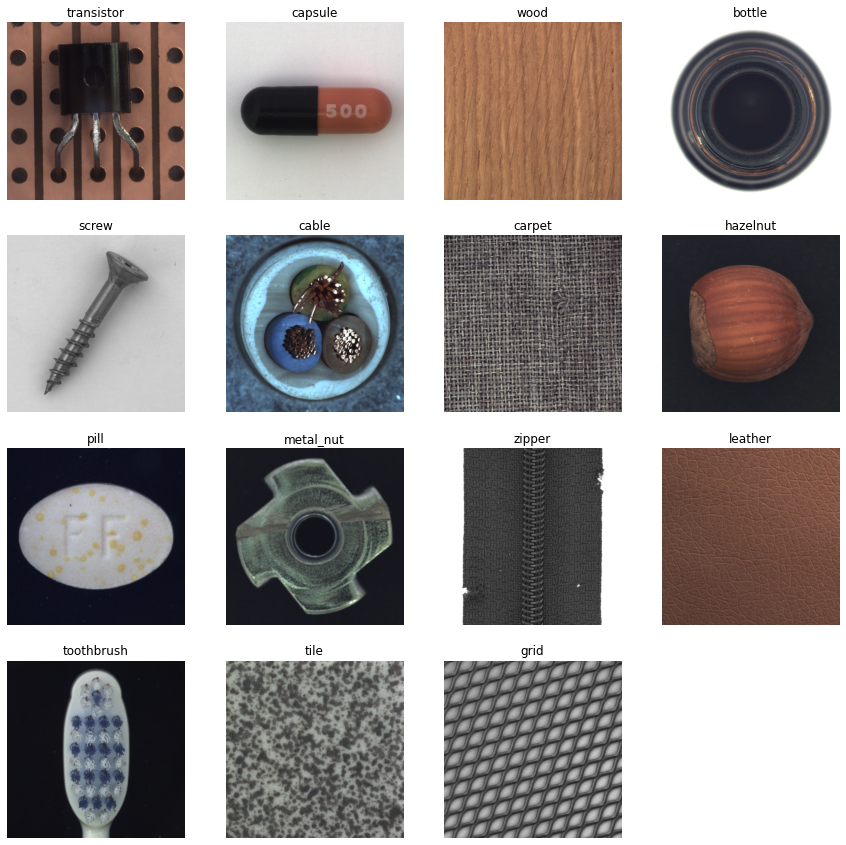

In [86]:
img_names = [list(train_df['file_name'][train_df['class']==label])[0] for label in label_list]
img_list = ['../data/train/'+ file_name for file_name in img_names]

fig, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()
for idx, (img_path, label) in enumerate(zip(img_list, label_list)) :

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[idx].imshow(img)
    axs[idx].set_title(label)
    axs[idx].set_axis_off()
fig.delaxes(axs[-1])
plt.show()

In [109]:
a = {'1':1, '2':2, '3':3}
a.keys()

dict_keys(['1', '2', '3'])